In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_train  = pd.read_csv("wine_train.csv")
y_train = X_train['target']
X_train  = X_train.drop('target', axis=1)

X_test  = pd.read_csv("wine_test.csv")
y_test = X_test['target']
X_test  = X_test.drop('target', axis=1)

In [35]:
X_train.head(5)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


In [36]:
y_train.head(10)


0    1
1    2
2    1
3    1
4    2
5    1
6    0
7    2
8    0
9    1
Name: target, dtype: int64

In [37]:
X_test.head(5)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


In [38]:
print("The alcohol per instance is:")
print(X_train['alcohol'].head(10))
print("The mean of the alcohol percentage is:")
print(X_train['alcohol'].mean())

The alcohol per instance is:
0    12.08
1    13.58
2    12.37
3    11.82
4    13.16
5    13.11
6    13.83
7    12.87
8    14.06
9    12.22
Name: alcohol, dtype: float64
The mean of the alcohol percentage is:
12.997253521126757


In [39]:
X_train.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000


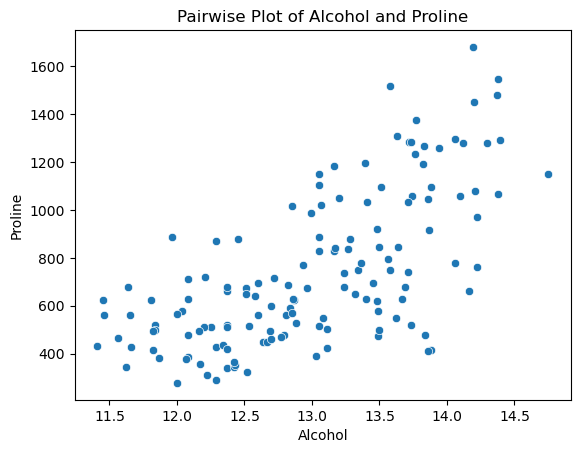

In [40]:
selected_columns = X_train[['alcohol', 'proline']]
sns.scatterplot(x='alcohol', y='proline', data=selected_columns)
plt.title('Pairwise Plot of Alcohol and Proline')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()

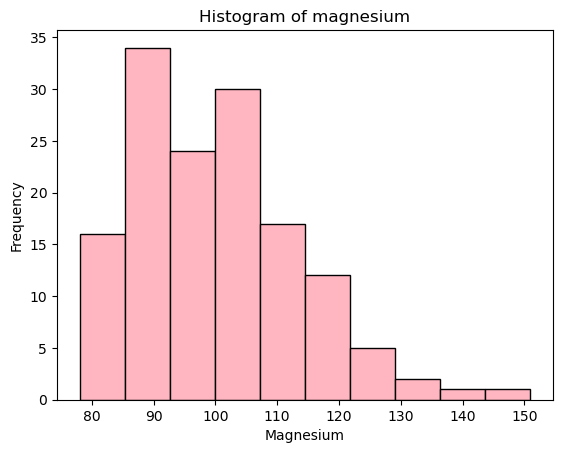

In [41]:
alcohol_data = X_train['magnesium']
plt.hist(alcohol_data)
plt.hist(alcohol_data, color='lightpink', edgecolor='black')
plt.xlabel('Magnesium')
plt.ylabel("Frequency")
plt.title(f"Histogram of magnesium")
plt.show()

In [42]:
#Standartization

scaler_standart = StandardScaler()
X_train_scaled_standart = scaler_standart.fit_transform(X_train)
X_train_scaled_standart

array([[-1.16529288, -0.42933791, -0.14771586, ...,  0.55486938,
        -0.51551028, -0.83021608],
       [ 0.74033003,  0.25907653,  1.16326244, ..., -0.99866191,
        -1.17234793,  0.02385794],
       [-0.79687245, -1.24625638, -3.54917308, ...,  0.41779309,
        -1.1443974 , -0.7036866 ],
       ...,
       [-1.16529288, -1.07185806,  0.52548921, ...,  1.60578761,
         0.11337683, -0.35573052],
       [ 1.52798749, -0.49358992,  0.31289813, ...,  0.41779309,
         0.29505533,  2.23812391],
       [ 1.54069164,  1.59918999,  0.27746629, ..., -0.40466466,
         0.96586825,  1.06772618]])

In [47]:
#MinMax

scaler_minmax = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_train_scaled_minmax

array([[-0.5988024 , -0.55600815,  0.02673797, ...,  0.2371134 ,
        -0.27675277, -0.71184023],
       [ 0.2994012 , -0.25050916,  0.42245989, ..., -0.46391753,
        -0.62361624, -0.32667618],
       [-0.4251497 , -0.9185336 , -1.        , ...,  0.17525773,
        -0.60885609, -0.65477889],
       ...,
       [-0.5988024 , -0.84114053,  0.22994652, ...,  0.71134021,
         0.05535055, -0.4978602 ],
       [ 0.67065868, -0.58452138,  0.1657754 , ...,  0.17525773,
         0.15129151,  0.67189729],
       [ 0.67664671,  0.34419552,  0.15508021, ..., -0.19587629,
         0.50553506,  0.14407989]])

In [48]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grids
param_grid_knn = {
    'n_neighbors': [5, 10],
    'metric': ['manhattan', 'chebyshev']
}
param_grid_dt = {
    'max_depth': [4, 6]
}

# Define a function to perform grid search with scaling
def perform_grid_search(X_train, y_train, scaling_method, scaling_name):
    # Apply scaling
    scaler = scaling_method()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Create a list to store grid search objects
    grid_searches = []
    
    # Instantiate the GridSearchCV object for each KNN and Decision Tree model
    for params, estimator in [(param_grid_knn, KNeighborsClassifier()), (param_grid_dt, DecisionTreeClassifier())]:
        grid_search = GridSearchCV(estimator=estimator, param_grid=params, cv=5, scoring='f1_macro')
        grid_searches.append(grid_search)
    
    # Fit the grid search objects
    for grid_search in grid_searches:
        grid_search.fit(X_train_scaled, y_train)
    
    # Collect all results
    all_results = []
    for grid_search in grid_searches:
        results = pd.DataFrame(grid_search.cv_results_)
        results = results[['mean_test_score', 'params']]
        results['estimator'] = grid_search.estimator.__class__.__name__
        results['scaling'] = scaling_name  # Add the scaling method name
        all_results.append(results)
    
    # Concatenate all results
    all_results_df = pd.concat(all_results, ignore_index=True)
    all_results_df.sort_values('mean_test_score', ascending=False, inplace=True)
    all_results_df.reset_index(drop=True, inplace=True)
    
    return all_results_df

# Assume X_train and y_train are already defined
# Perform grid search with Min-Max scaling
minmax_results_df = perform_grid_search(X_train, y_train, MinMaxScaler, 'MinMax')

# Perform grid search with Standardization
standard_results_df = perform_grid_search(X_train, y_train, StandardScaler, 'Standard')

# Combine results from both scaling methods
combined_results_df = pd.concat([minmax_results_df, standard_results_df], ignore_index=True)
combined_results_df.sort_values('mean_test_score', ascending=False, inplace=True)
combined_results_df.reset_index(drop=True, inplace=True)

# Style the combined DataFrame
styled_df = combined_results_df.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_properties(**{
    'border': '1px solid black',
    'font-size': '11pt'
}).hide_index()

# Display the styled DataFrame
styled_df


C:\Users\dasha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dasha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

mean_test_score,params,estimator,scaling
0.972285,"{'metric': 'manhattan', 'n_neighbors': 10}",KNeighborsClassifier,MinMax
0.972285,"{'metric': 'manhattan', 'n_neighbors': 10}",KNeighborsClassifier,Standard
0.958695,"{'metric': 'manhattan', 'n_neighbors': 5}",KNeighborsClassifier,MinMax
0.952114,"{'metric': 'chebyshev', 'n_neighbors': 10}",KNeighborsClassifier,Standard
0.950758,"{'metric': 'manhattan', 'n_neighbors': 5}",KNeighborsClassifier,Standard
0.945770,"{'metric': 'chebyshev', 'n_neighbors': 10}",KNeighborsClassifier,MinMax
0.937796,"{'metric': 'chebyshev', 'n_neighbors': 5}",KNeighborsClassifier,MinMax
0.929856,"{'metric': 'chebyshev', 'n_neighbors': 5}",KNeighborsClassifier,Standard
0.892515,{'max_depth': 4},DecisionTreeClassifier,MinMax
0.869319,{'max_depth': 6},DecisionTreeClassifier,MinMax


In [49]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn.fit(X_train_scaled_minmax, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [52]:
X_test_scaled_minmax = scaler_minmax.transform(X_test)


In [53]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

# Fit the classifier to the scaled training data
knn.fit(X_train_scaled_minmax, y_train)

# Predict the labels for the scaled test data
y_pred = knn.predict(X_test_scaled_minmax)

# Output the predictions
print("We predicted:")
print(y_pred)
print("Acctual category:")
print(y_test.to_numpy())

We predicted:
[2 0 2 1 2 1 0 1 1 1 1 0 0 2 1 2 1 0 1 1 0 2 1 0 0 0 2 1 2 2 2 1 0 1 2 0]
Acctual category:
[2 0 2 1 2 1 0 1 1 1 1 0 0 2 1 2 1 0 1 1 0 2 1 0 0 0 2 1 2 2 2 1 0 1 2 0]


C:\Users\dasha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
from sklearn.metrics import f1_score

y_test_array = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

# Calculate the macro average F1 score
macro_avg_f1 = f1_score(y_test_array, y_pred, average='macro')

# Output the macro average F1 score
print(f"Macro Average F1 Score: {macro_avg_f1:.3f}")

print("We perfected it! :-)")

Macro Average F1 Score: 1.000
We perfected it! :-)
